In [15]:
import numpy as np 
import igraph as ig
import leidenalg as la
import matplotlib.pyplot as plt


Ground truth # of clusters: 205
Predicted # of clusters: 74


<BarContainer object of 74 artists>

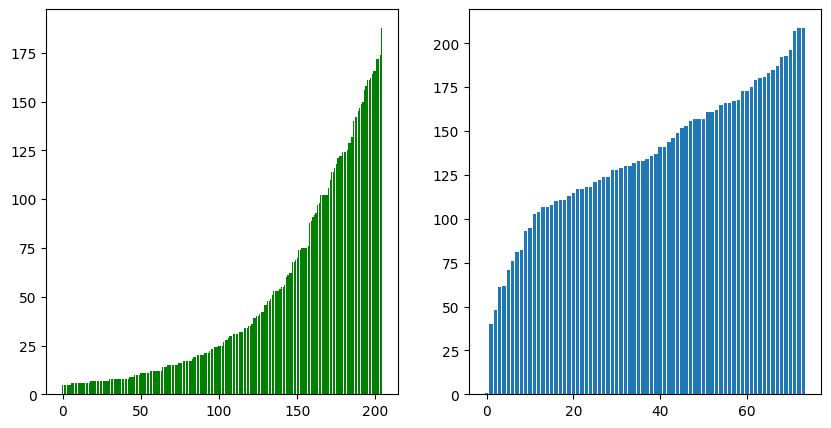

In [33]:
data_path = 'TC1-6/1-6.dat'
answer_path = data_path.replace('.dat', '-c.dat')
data = np.loadtxt(data_path).astype(int)
answers = np.loadtxt(answer_path).astype(int)

unique, counts = np.unique(answers[:, 1], return_counts=True)
print(f"Ground truth # of clusters: {len(unique)}")
sorted_counts = np.sort(counts)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Draw a histogram of the number of clusters
ax[0].bar(range(len(sorted_counts)), sorted_counts, color='g')

g = ig.Graph(data, directed=False)
partition = la.find_partition(g, la.ModularityVertexPartition, n_iterations=100, seed=5590,)
print(f"Predicted # of clusters: {len(partition)}")
counts = [len(c) for c in partition]
sorted_counts = np.sort(counts)
ax[1].bar(range(len(counts)), sorted_counts)


In [4]:
ans = {
    'vertexes': [],
    'clusters': [],
}
pred = {
    'vertexes': [],
    'clusters': [],
    'wrong': [],
}
ans['clusters'] = np.unique(answers[:, 1])
for cluster in ans['clusters']:
    ans['vertexes'].append(answers[answers[:, 1] == cluster, 0])

for i, vertexes in enumerate(partition):
    pred['vertexes'].append(vertexes)
    pred['clusters'].append(i)
    pred['wrong'].append(None)

# ans['vertexes'] = np.array(ans['vertexes'])
ans['clusters'] = np.array(ans['clusters'])
# pred['vertexes'] = np.array(pred['vertexes'])
# pred['clusters'] = np.array(pred['clusters'])
# pred['wrong'] = np.array(pred['wrong'])

In [24]:
# 알고리즘 설명.
# pred_cluster는 예측된 cluster의 ID이고, pred_vertexes는 해당 cluster에 속하는 vertex들의 ID이다.
# ans_cluster는 정답 cluster의 ID이고, ans_vertexes는 해당 cluster에 속하는 vertex들의 ID이다.
# pred cluster 중에서 ans cluster와 가장 많이 겹치는 cluster를 찾아서 그 cluster로 변경한다.
# 이때, 변경된 cluster에 속하지 않는 vertex들을 pred['wrong']에 저장한다.
impurity = 0
for pred_cluster, pred_vertexes in zip(pred['clusters'], pred['vertexes']):
    max_intersection = 0
    max_intersection_cluster = -1
    max_intersection_vertexes = []
    for ans_cluster, ans_vertexes in zip(ans['clusters'], ans['vertexes']):
        # 겹치는 vertex들의 개수를 센다.
        intersection = len(set(pred_vertexes).intersection(set(ans_vertexes)))
        # 가장 많이 겹치는 cluster를 찾는다.
        if intersection > max_intersection:
            max_intersection = intersection
            max_intersection_cluster = ans_cluster
            max_intersection_vertexes = ans_vertexes
    # print(f"{max_intersection}")
    # 잘못된 vertex들을 저장한다. (setdiff1d 함수는 두 배열의 차집합을 구하는 함수이다.)
    pred['wrong'][pred_cluster] = np.setdiff1d(pred_vertexes, max_intersection_vertexes)
    impurity += len(pred['wrong'][pred_cluster]) / len(max_intersection_vertexes) if len(max_intersection_vertexes) != 0 else 0
    
    print(f"Change cluster ID {pred_cluster} to {max_intersection_cluster}")


Change cluster ID 0 to 81
Change cluster ID 1 to 158
Change cluster ID 2 to 38
Change cluster ID 3 to 67
Change cluster ID 4 to 143
Change cluster ID 5 to 124
Change cluster ID 6 to 76
Change cluster ID 7 to 133
Change cluster ID 8 to 187
Change cluster ID 9 to 111
Change cluster ID 10 to 116
Change cluster ID 11 to 63
Change cluster ID 12 to 154
Change cluster ID 13 to 75
Change cluster ID 14 to 1
Change cluster ID 15 to 11
Change cluster ID 16 to 33
Change cluster ID 17 to 121
Change cluster ID 18 to 107
Change cluster ID 19 to 40
Change cluster ID 20 to 122
Change cluster ID 21 to 136
Change cluster ID 22 to 16
Change cluster ID 23 to 62
Change cluster ID 24 to 192
Change cluster ID 25 to 37
Change cluster ID 26 to 71
Change cluster ID 27 to 157
Change cluster ID 28 to 146
Change cluster ID 29 to 83
Change cluster ID 30 to 201
Change cluster ID 31 to 110
Change cluster ID 32 to 79
Change cluster ID 33 to 10
Change cluster ID 34 to 159
Change cluster ID 35 to 84
Change cluster ID 36 

In [6]:
# Concate
pred['wrong_cat'] = sorted(np.concatenate(pred['wrong']))

In [7]:
print(f"Acc: {100  - len(pred['wrong_cat'])/len(answers) * 100:.3f}%")
print(f"Error: {len(pred['wrong_cat'])/len(answers) * 100:.3f}%")
print(f"Impurity: {impurity / len(pred['clusters']) * 100:.3f}%")

Acc: 83.100%
Error: 16.900%
Impurity: 34.535%


In [8]:
in_cluster_vertices = next(iter(partition))
print(sorted(in_cluster_vertices))
new_data = []

for index in range(len(data) // 2):
    node1, node2 = data[index]
    if node1 in in_cluster_vertices and node2 in in_cluster_vertices:
        new_data.append([node1, node2])
        new_data.append([node2, node1])

new_data = np.array(new_data)
print(new_data)

igraph = ig.Graph(new_data, directed=False)
clster = la.find_partition(igraph, la.ModularityVertexPartition, n_iterations=100, seed=5590,)
print(f"{len(clster)} clusters found")
# Print the sorted data
print(new_data)

# filter edge data to only include vertices in the first cluster
filtered_data = []
for edge in data:
    if edge[0] in first_cluster_vtx and edge[1] in first_cluster_vtx:
        filtered_data.append(edge)



filtered_data = np.array(filtered_data)

print("filterted_edges", len(filtered_data))
# pair inside the filtered data , by reversing its order, and return remainder


for edge in filtered_data:
    if [edge[1], edge[0]] in filtered_data:
        continue
    else:
        print(edge, "was not paired, why the fuck did this happened")

# create a new graph with only the first cluster
g = ig.Graph(filtered_data, directed=False)
n_partition = la.find_partition(g, la.ModularityVertexPartition, n_iterations=100, seed=5590,)
print(f"{len(n_partition)} clusters found")


[2, 116, 134, 188, 228, 285, 295, 304, 352, 391, 408, 436, 466, 571, 625, 627, 655, 672, 704, 709, 748, 847, 859, 867, 874, 917, 930, 933, 1065, 1126, 1148, 1162, 1175, 1274, 1287, 1293, 1309, 1394, 1449, 1464, 1506, 1590, 1778, 1801, 1868, 1962, 1963, 2074, 2105, 2135, 2173, 2190, 2199, 2213, 2385, 2446, 2486, 2539, 2574, 2581, 2634, 2657, 2769, 2933, 2935, 2944, 2960, 2987, 3001, 3019, 3280, 3332, 3358, 3421, 3493, 3528, 3586, 3701, 3730, 3761, 3765, 3795, 3854, 3882, 3908, 3932, 3958, 3965, 4004, 4033, 4049, 4165, 4279, 4320, 4321, 4395, 4444, 4468, 4546, 4746, 4848, 4908, 4909, 4929, 4964, 5051, 5115, 5134, 5179, 5233, 5258, 5314, 5335, 5371, 5421, 5466, 5642, 5675, 5717, 5738, 5739, 5782, 5798, 5823, 5869, 5929, 5992, 6049, 6100, 6101, 6199, 6246, 6317, 6384, 6540, 6548, 6632, 6777, 6865, 6878, 6943, 6958, 7046, 7048, 7090, 7145, 7184, 7256, 7336, 7345, 7429, 7565, 7579, 7622, 7687, 7705, 7738, 7766, 7786, 7882, 7996, 8102, 8154, 8317, 8323, 8390, 8451, 8484, 8501, 8531, 8534, 855

NameError: name 'first_cluster_vtx' is not defined

In [ ]:
[len(x) for x in n_partition]

[51,
 36,
 31,
 30,
 30,
 10,
 7,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [ ]:
error_pair = np.array([])
for node1 in pred['wrong_cat']:
    node2 = sorted(data[data[:, 0] == node1, 1])
    node1 = np.repeat(node1, len(node2))
    pair = np.column_stack((node1, node2))
    error_pair = np.vstack((error_pair, pair)) if error_pair.size else pair

In [ ]:
new_data = next(iter(partition))
node1 = []
node2 = []
for node in new_data:
    node2.append(data[data[:, 0] == node, 1])
    node1.append(np.repeat(node, len(node2[-1])))


In [ ]:
print(error_pair)

with open('./wrong.dat', 'w') as f:
    for pair in error_pair:
        f.write(f"{pair[0]}\t{pair[1]}\n")

[[   2 1162]
 [   2 3019]
 [   2 4033]
 ...
 [9333 9168]
 [9333 9725]
 [9333 9952]]
